# **ATTACKS DETECTION IN THE IOT USING DEEP BOLTZMANN MACHINE**
---


---


# **Tiền xử lý dữ liệu**

## **Chuẩn hóa dữ liệu**

Mounted at /content/drive/


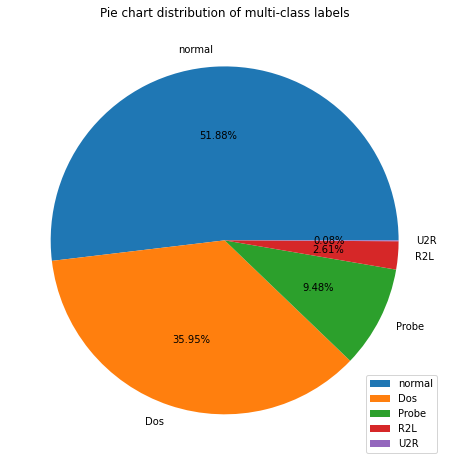


Numeric attributes columns: 
Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')
After normalizing: 
   duration     src_bytes     dst_bytes  land  wrong_fragment  urgent  hot  \
0  0.000000  0.000000e+00  0.000000e+00   0.0             0.0     0.0  0.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount('/content/drive/')

col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

def change_label(df):
    df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
    df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail',
       'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
    df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
    df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

def normalization(df,col):
    std_scaler = MinMaxScaler()
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
    return df

def data_preprocessing(file):
    # importing dataset
    data = pd.read_csv(file, header  = None, names = col_names)

    # remove attribute 'difficulty_level'
    data.drop(['difficulty_level'],axis=1,inplace=True)
    change_label(data)
    return data

def data_normalization(data):
    # selecting numeric attributes columns from data
    numeric_col = data.select_dtypes(include='number').columns

    # using standard scaler for normalizing
    numeric = normalization(data.copy(),numeric_col)
    return numeric[numeric_col]

def one_hot_vector_encoding(data):
    # selecting categorical data attributes
    cat_col = ['protocol_type','service','flag']

    # creating a dataframe with only categorical attributes
    categorical = data[cat_col]

    # one-hot-encoding categorical attributes using pandas.get_dummies() function
    categorical = pd.get_dummies(categorical,columns=cat_col)
    return categorical

if __name__ == '__main__':

    file = '/content/drive/MyDrive/Colab Notebooks/dataset/NSL_KDD.csv'

    # data preproccessing: load data and remove attribute 'difficulty_level'
    data = data_preprocessing(file)

    # pie chart distribution of multi-class labels
    plt.figure(figsize=(8,8))
    count_labels = data.label.value_counts()
    plt.pie(count_labels,labels=count_labels.keys(),autopct='%0.2f%%')
    plt.title('Pie chart distribution of multi-class labels')
    plt.legend()
    plt.show()

    # data normalization: selecting numeric attributes columns from data and using MinMax scaler for normalizing
    numeric = data_normalization(data)
    print('\nNumeric attributes columns: ')
    print(numeric.keys())
    print('After normalizing: ')
    print(numeric.head(10))

    # one-hot-encoding categorical attributes
    categorical = one_hot_vector_encoding(data)
    print('\nCategorical attributes: ')
    print(['protocol_type','service','flag'])
    print('After encoding: ')
    print(categorical.keys())
    print(categorical.head(10))

    # intrusion (0, 1) <=> (Normal,Attack)
    le = {'normal': 0, 'Dos':1, 'Probe':1, 'R2L':1, 'U2R': 1}
    intrusion = data.label.apply(lambda x: le[x])

    # normalized data
    label = data['label']
    data = numeric.join(categorical)
    data['intrusion'] = intrusion
    data['label'] = label

    #summarize
    print('\n          NORMALIZED DATASET')
    print('Shape of dataset:',data.shape)
    print('          ',data.shape[1]-2,'input features')
    print('            1 intrusion(0: normal, 1: abnormal)')
    print('            1 label(Normal, Dos, Probe, R2L, U2R)')
    print('Number of samples:',data.shape[0])
    print('           Normal:',data[data['label']=='normal'].shape[0])
    print('              Dos:',data[data['label']=='Dos'].shape[0])
    print('            Probe:',data[data['label']=='Probe'].shape[0])
    print('              R2L:',data[data['label']=='R2L'].shape[0])
    print('              U2R:',data[data['label']=='U2R'].shape[0])

    # saving final dataset to disk
    data.to_csv('/content/drive/MyDrive/Colab Notebooks/dataset/normalized_data.csv', index = None)



## **Cân bằng dữ liệu**

In [ ]:
# import libary
from imblearn.over_sampling import RandomOverSampler

# load normalized NSL-KDD data
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/normalized_data.csv')

n_features = 123
X = dataset.iloc[:,:n_features]
y = dataset.iloc[:,n_features]

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy={'R2L': 10000, 'U2R':10000})

# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

# save selected dataset
balanced_data = pd.concat([X_over, y_over], axis = 1)
balanced_data = balanced_data.sample(frac=1).reset_index(drop=True)
balanced_data.to_csv('/content/drive/MyDrive/Colab Notebooks/dataset/balanced_data.csv', index = None)

print('Before: Shape', dataset.shape)
print('After : Shape',balanced_data.shape)

#summarize
print('\n          BALANCED DATASET')
print('Shape of dataset:',balanced_data.shape)
print('          ',balanced_data.shape[1]-2,'input features')
print('            1 intrusion(0: normal, 1: abnormal)')
print('            1 label(Normal, Dos, Probe, R2L, U2R)')
print('Number of samples:',balanced_data.shape[0])
print('           Normal:',balanced_data[balanced_data['label']=='normal'].shape[0])
print('              Dos:',balanced_data[balanced_data['label']=='Dos'].shape[0])
print('            Probe:',balanced_data[balanced_data['label']=='Probe'].shape[0])
print('              R2L:',balanced_data[balanced_data['label']=='R2L'].shape[0])
print('              U2R:',balanced_data[balanced_data['label']=='U2R'].shape[0])

Before: Shape (148517, 124)
After : Shape (164518, 124)

          BALANCED DATASET
Shape of dataset: (164518, 124)
           122 input features
            1 intrusion(0: normal, 1: abnormal)
            1 label(Normal, Dos, Probe, R2L, U2R)
Number of samples: 164518
           Normal: 77054
              Dos: 53387
            Probe: 14077
              R2L: 10000
              U2R: 10000


# **Phân tích chiết suất đặc trưng nhận dạng (không tấn công và tấn công)**


Mounted at /content/drive/


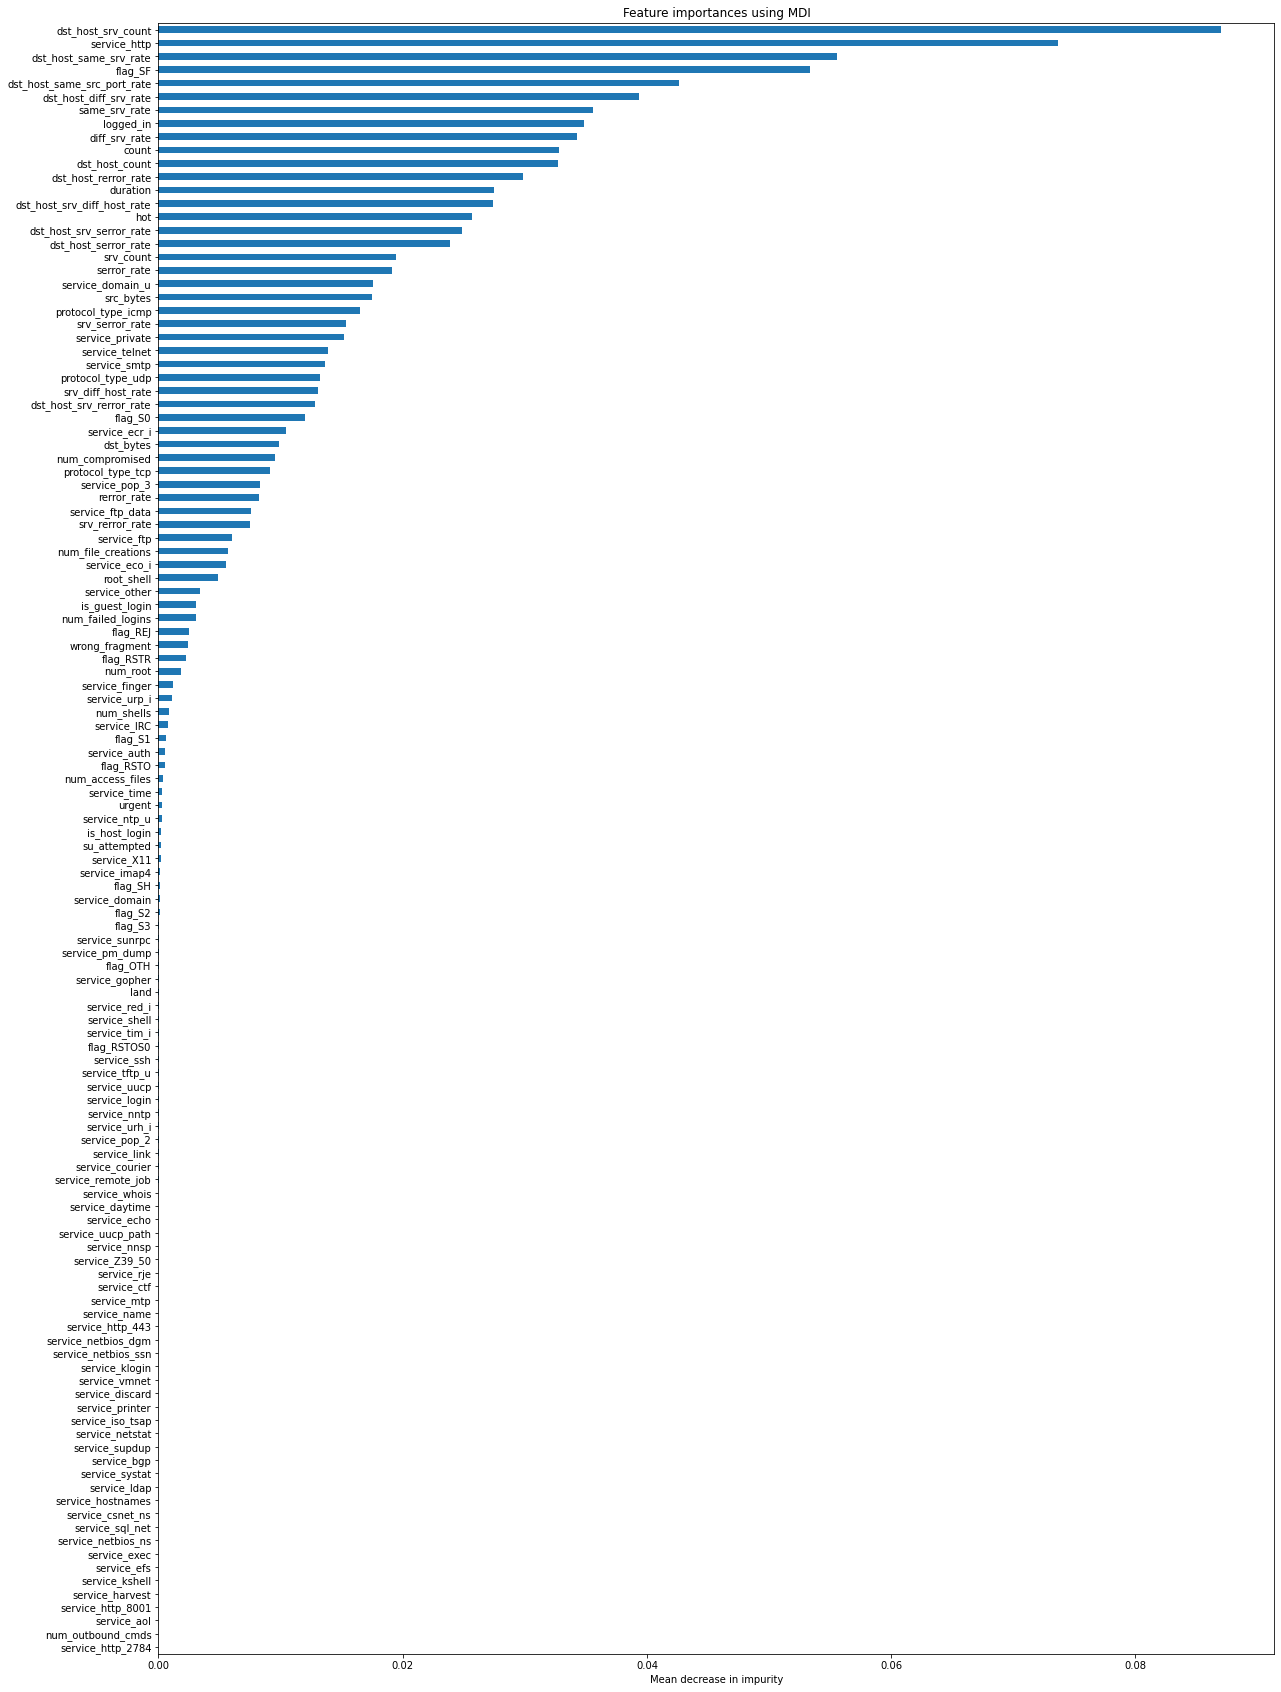

Threshold: 0.00819672131147541
Num selected Features: 36
Selected Features ['duration' 'src_bytes' 'dst_bytes' 'hot' 'logged_in' 'num_compromised'
 'count' 'srv_count' 'serror_rate' 'srv_serror_rate' 'rerror_rate'
 'same_srv_rate' 'diff_srv_rate' 'srv_diff_host_rate' 'dst_host_count'
 'dst_host_srv_count' 'dst_host_same_srv_rate' 'dst_host_diff_srv_rate'
 'dst_host_same_src_port_rate' 'dst_host_srv_diff_host_rate'
 'dst_host_serror_rate' 'dst_host_srv_serror_rate' 'dst_host_rerror_rate'
 'dst_host_srv_rerror_rate' 'protocol_type_icmp' 'protocol_type_tcp'
 'protocol_type_udp' 'service_domain_u' 'service_ecr_i' 'service_http'
 'service_pop_3' 'service_private' 'service_smtp' 'service_telnet'
 'flag_S0' 'flag_SF']


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# load normalized NSL-KDD data
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/balanced_data.csv')

n_features = 122
X = dataset.iloc[:,:n_features]
y = dataset.iloc[:,n_features]

# Create a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=1)
# n_estimators = The number of trees in the forest.

# Train the classifier
rf_clf.fit(X, y)

# plot graph of feature importances for better visualization
feat_importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
ax = feat_importances.nsmallest(n_features).plot(kind='barh')
fig = ax.figure
fig.set_size_inches(20, 30)
plt.title('Feature importances using MDI')
plt.xlabel("Mean decrease in impurity")
plt.show()

from sklearn.feature_selection import SelectFromModel
# Create a selector object that will use the random forest classifier to identify
# It will select the features based on the importance score
rf_sfm = SelectFromModel(rf_clf)

# Train the selector
rf_sfm = rf_sfm.fit(X, y)

print('Threshold:',rf_sfm.threshold_)
selected_features = rf_sfm.get_feature_names_out()
print("Num selected Features:", len(selected_features))
print("Selected Features", selected_features)

# save selected dataset
selected_data = pd.concat([dataset[selected_features], dataset.iloc[:, n_features:]],axis = 1)
selected_data.to_csv('/content/drive/MyDrive/Colab Notebooks/dataset/selected_data.csv', index = None)

n_features = len(selected_data.keys())-2

# **Chia tập dữ liệu với tỷ lệ 75: 25**

In [ ]:
# train + validation = 75%
train_per = 0.65
val_per = 0.1
# test per = 25%
test_per = 0.25

# load selected NSL-KDD data
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/selected_data.csv')

# ds_label = [Normal_Ds, Dos_ds, Probe_ds, ...]
ds_label = [dataset[dataset['label'] == label] for label in dataset.label.unique()]

# thresholds
split1 = [int(ds.shape[0]*train_per) for ds in ds_label]
split2 = [int(ds.shape[0]*(train_per+val_per)) for ds in ds_label]

# train, val, test data
train_data = pd.concat([ds_label[i].iloc[:split1[i],:] for i in range(len(ds_label))], axis=0)
val_data = pd.concat([ds_label[i].iloc[split1[i]:split2[i],:] for i in range(len(ds_label))], axis=0)
test_data = pd.concat([ds_label[i].iloc[split2[i]:,:] for i in range(len(ds_label))], axis=0)

# save train, val, test dataset
train_data.to_csv('/content/drive/MyDrive/Colab Notebooks/dataset/train_data.csv', index = None)
val_data.to_csv('/content/drive/MyDrive/Colab Notebooks/dataset/val_data.csv', index = None)
test_data.to_csv('/content/drive/MyDrive/Colab Notebooks/dataset/test_data.csv', index = None)

# **Training Deep Boltzmann Machine**

In [ ]:
import math

# binarize input data
def binarize_data(input, threshold, upper = 1, lower = 0):
    return np.where(input >= threshold, upper, lower)

# one-hot encoding labels
def one_hot(y, n_classes=None):
    n_classes = n_classes or np.max(y) + 1
    return np.eye(n_classes)[y]

# decision values one-hot encoding
def one_hot_decision_function(y):
    z = np.zeros_like(y)
    z[np.arange(len(z)), np.argmax(y, axis=1)] = 1
    return z

# one_hot encoding -> labels
def unhot(y, n_classes=None):
    if not isinstance(y, np.ndarray):
        y = np.asarray(y)
    if not n_classes:
        _, n_classes = y.shape
    return y.dot(np.arange(n_classes))

# output activation of visible and hidden layers
def sigmoid(X):
    return 1 / (1+np.exp(-X))

# initialize weight
def init_w(insize, outsize):
    a = math.sqrt(6.0 / (insize + outsize))
    return np.random.uniform(-a, a, size=(insize, outsize))
    # Returns Drawn samples from the parameterized uniform distribution.

# initailize bias
def init_b(size):
    return np.zeros((size, 1))

# used to estimate the data-dependent expectation
def mean_field(X, model, mf_steps):
    ws = model['weight']
    bs = model['bias'][1:]
    mu = [np.random.rand(b.shape[0], X.shape[1]) for b in bs]
    for i in range(mf_steps):
        mu[0] = sigmoid(np.dot(ws[0].T, X) + np.dot(ws[1], mu[1]) + bs[0])
        for j in range(1,len(mu)-1):
            mu[j] = sigmoid(np.dot(ws[j].T, mu[j-1]) + np.dot(ws[j+1], mu[j+1]) + bs[j])
        mu[-1] = sigmoid(np.dot(ws[-1].T, mu[-2]) + bs[-1])
    return mu

#  used to approximate the model's expectation
def gibbs_sampling(l, model, gs_steps):
    ws = model['weight']
    bs = model['bias']
    for i in range(gs_steps):
        for j in range(1,len(l)-1):
            l[j] = sigmoid(np.dot(ws[j-1].T, l[j-1]) + np.dot(ws[j],l[j+1]) + bs[j])
            l[j] = np.random.binomial(1, l[j])
        l[-1] = sigmoid(np.dot(ws[-1].T, l[-2]) + bs[-1])
        l[-1] = np.random.binomial(1, l[-1])
        l[0] = sigmoid(np.dot(ws[0],l[1]) + bs[0])
        l[0] = np.random.binomial(1,l[0])
    return l

# loss function for reconstruct input with DBM
def get_cross_entropy(X, model):
    ws =  model['weight']
    v = model['bias'][0]

    _l = [X]
    for i in range(len(ws)):
        _l.append(np.random.rand(ws[i].shape[1], X.shape[1]))
    _l = gibbs_sampling(_l, model, 1)

    v = sigmoid(np.dot(ws[0], _l[1]) + v)
    cross_entropy = -np.mean(np.sum(X * np.ma.log(v).filled(0), axis=0))
    return cross_entropy

def sigmoid_prime(sigmoid_out):
    return sigmoid_out*(1-sigmoid_out)

def softmax(x):
    exponent = np.exp(x) # only compute the exponent once
    return exponent/exponent.sum(axis=1,keepdims=True)

def init_layers(batch_size,layer_sizes):
    hidden_layers = [np.empty((batch_size,layer_size)) for layer_size in layer_sizes]
    return hidden_layers

def feed_forward(batch,hidden_layers,model):
    h_l = batch
    hidden_layers[0] = h_l
    for i,weight in enumerate(model['weight']):
        h_l = sigmoid(h_l.dot(weight)+model['bias'][i+1].T)
        hidden_layers[i+1]=h_l
    output = softmax(hidden_layers[-1])
    return output, hidden_layers

# update param with backpropagation algorithm
def back_prop(output,batch_y,hidden_layers,model,batch_size,lr):
    delta_t = (output - batch_y)*sigmoid_prime(hidden_layers[-1])
    for i in range(1,len(model['weight'])+1):
        model['weight'][-i]-=lr*(hidden_layers[-i-1].T.dot(delta_t))/batch_size
        model['bias'][-i]-=lr*(np.sum(delta_t,0)/batch_size).reshape(-1,1)
        delta_t = sigmoid_prime(hidden_layers[-i-1])*(delta_t.dot(model['weight'][-i].T))
    return model

# loss function
def loss(y_pred,y):
    return ((-np.ma.log(y_pred).filled(0))*y).sum(axis=1).mean()

def accuracy(y_pred,y):
    return np.all(y_pred==y,axis=1).mean()

def to_categorical(x):
    return one_hot_decision_function(x)

def predict(X, model):
    layers = init_layers(X.shape[0],[len(b) for b in model['bias']])
    output, _ = feed_forward(X, layers, model)
    return output

Algorithm: training procedure of the DBM (Salakhutdinov & Hinton, 2019; Cho et al., 2013)
TRAINING DEEP BOLTZMANN MACHINE ...
Epoch   1: ----------------------------------------------------------------------------------------------------
Calculating ...Train_cross_entropy: 4.435799  --- Val_cross_entropy: 4.404385 --- Time: 48s
Epoch   2: ----------------------------------------------------------------------------------------------------
Calculating ...Train_cross_entropy: 3.963474  --- Val_cross_entropy: 3.931110 --- Time: 49s
Epoch   3: ----------------------------------------------------------------------------------------------------
Calculating ...Train_cross_entropy: 3.717570  --- Val_cross_entropy: 3.680417 --- Time: 49s
Epoch   4: ----------------------------------------------------------------------------------------------------
Calculating ...Train_cross_entropy: 3.639879  --- Val_cross_entropy: 3.596906 --- Time: 46s
Epoch   5: -----------------------------------------------

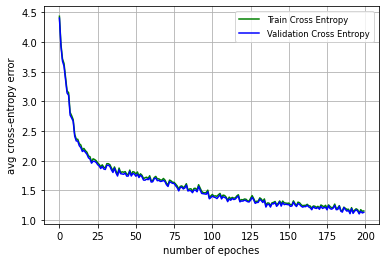

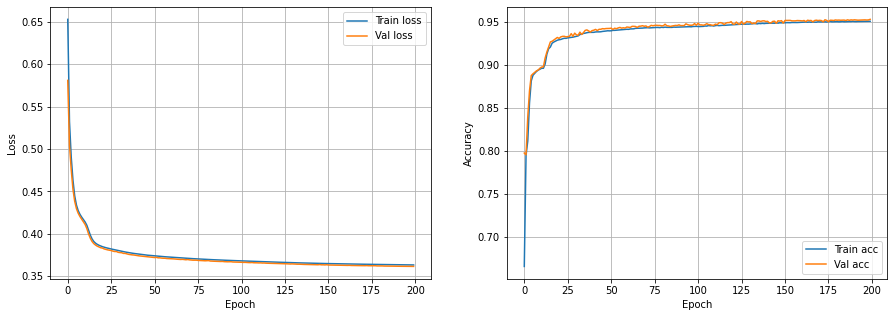

In [ ]:
# load normalized NSL-KDD data
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/train_data.csv')
val_data   = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/val_data.csv')
test_data  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/test_data.csv')

# split dataset => X, y
X_train, y_train = train_data.iloc[:,:n_features].to_numpy(), one_hot(train_data.iloc[:,n_features].to_numpy())
X_val  , y_val   = val_data.iloc[:,:n_features].to_numpy(), one_hot(val_data.iloc[:,n_features].to_numpy())
X_test , y_test  = test_data.iloc[:,:n_features].to_numpy(), one_hot(test_data.iloc[:,n_features].to_numpy())

threshold_binary = 0.5
# binarize and transpose input
_X_train = binarize_data(X_train, threshold_binary).T  # size 122*... <no>
_X_val = binarize_data(X_val, threshold_binary).T

# initialize model
num_layers = [_X_train.shape[0], 100, 200]
model = {}
model['weight'] = [init_w(num_layers[i], num_layers[i+1]) for i in range(len(num_layers)-1)]
model['bias'] = [init_b(num) for num in num_layers]

# training Deep Boltzmann Machine
train_error, val_error = [], []
print("===============================================================================================================")
print("Algorithm: training procedure of the DBM (Salakhutdinov & Hinton, 2019; Cho et al., 2013)")
print("TRAINING DEEP BOLTZMANN MACHINE ...")
print("===============================================================================================================")
# persistent chains
K = 100
l = [np.random.binomial(1,0.5,(num, K)) for num in num_layers]
# binomial Function returns random samples from a binomial distribution.

# params model
epochs = 200
learning_rate = 0.01
batch_size = 128
mf_steps = 10 # mean_field steps
gs_steps = 3 # gibbs_sampling step

import time
# for epoch=0 to nepochs do
for epoch in range(epochs):
    print('Epoch %3d:' % (epoch + 1), end = " ")
    start = time.time()

    iters = int(_X_train.shape[1]/batch_size)
    last_percentage = 0

    # for ite=0 to nite do
    for i in range(iters):
        new_percentage = int(math.ceil((i+1)/iters*100))
        if new_percentage > last_percentage :
            print((new_percentage - last_percentage)*"-", end = '')
            last_percentage = new_percentage

        rows = np.random.permutation(_X_train.shape[1])[:batch_size]
        X_batch = _X_train[:, rows]  # mini-batch

        # persistent contrastive divergence (PCD) through mean-field approximation
        mu = mean_field(X_batch, model, mf_steps)

        #  Gibbs sampling through Markov chain Monte Carlo method
        l = gibbs_sampling(l, model, gs_steps)

        l_X_batch, l_v = [], []
        l_X_batch.append(sigmoid(np.dot(model['weight'][0].T,X_batch)+np.dot(model['weight'][1],mu[1])+model['bias'][1]))
        l_v.append(sigmoid(np.dot(model['weight'][0].T,l[0])+np.dot(model['weight'][1],l[2])+model['bias'][1]))
        for i in range(1,len(l)-2):
            l_X_batch.append(sigmoid(np.dot(model['weight'][i].T,mu[i-1])+np.dot(model['weight'][i+1],mu[i+1])+model['bias'][i+1]))
            l_v.append(sigmoid(np.dot(model['weight'][i].T,l[i])+np.dot(model['weight'][i+1],l[i+2])+model['bias'][i+1]))
        l_X_batch.append(sigmoid(np.dot(model['weight'][-1].T,mu[-2])+model['bias'][-1]))
        l_v.append(sigmoid(np.dot(model['weight'][-1].T, l[-2])+model['bias'][-1]))

        # Update the parameters of DBM with PCD
        model['weight'][0]+=learning_rate*(X_batch.dot(mu[0].T)/X_batch.shape[1]-l[0].dot(l[1].T)/l[0].shape[1])
        for i in range(1, len(model['weight'])):
            model['weight'][i]+=learning_rate*(mu[i-1].dot(mu[i].T)/mu[i-1].shape[1]-l[i].dot(l[i+1].T)/l[i].shape[1])
        model['bias'][0]+= learning_rate*(np.sum(X_batch,axis=1,keepdims=True)/X_batch.shape[1]-np.sum(l[0],axis=1,keepdims=True)/l[0].shape[1])
        for i in range(1, len(model['bias'])):
            model['bias'][i]+=learning_rate*(np.sum(l_X_batch[i-1],axis=1,keepdims=True)/l_X_batch[i-1].shape[1]-np.sum(l_v[i-1],axis=1,keepdims=True)/l_v[i-1].shape[1])

    # Calculating cross entropy
    end = time.time()
    print('\nCalculating ...', end = '')
    train_cross_entropy = get_cross_entropy(_X_train, model)
    val_cross_entropy = get_cross_entropy(_X_val, model)
    train_error.append(train_cross_entropy)
    val_error.append(val_cross_entropy)
    print('Train_cross_entropy: %f  --- Val_cross_entropy: %f' % (train_cross_entropy, val_cross_entropy), end = ' --- ')
    print('Time: ' + str(round(end-start)) + 's')

fig, ax = plt.subplots()
epochs = [i for i in range(epochs)]
ax.plot(epochs, train_error, 'g', label='Train Cross Entropy')
ax.plot(epochs, val_error, 'b', label='Validation Cross Entropy')
ax.set_xlabel("number of epoches")
ax.set_ylabel("avg cross-entropy error")
legend = ax.legend(loc='upper right', shadow=False)
for label in legend.get_texts():
    label.set_fontsize('small')
ax.grid()

# discriminative fine-tuning: initialize MLP with learned weights, add FC layer and train using backprop
print("===============================================================================================================")
print("Initialize MLP withlearned weights, add Fully Connected layer and train using backprop")
print("DISCRIMINATIVE FINE-TUNING ...")
print("===============================================================================================================")

n_labels = 2
# add FC layer to the Network, activation is softmax
num_layers.append(n_labels)
model['weight'].append(init_w(model['weight'][-1].shape[1], n_labels))
model['bias'].append(init_b(n_labels))

n_samples = X_train.shape[0]
# params model
epochs = 200
learning_rate = 0.02
batch_size = 32

# initialize
list_train_loss = []
list_train_acc = []
list_val_loss = []
list_val_acc = []

# for each epoch in epochs
for epoch in range(epochs):
    print('Epoch %3d:' % (epoch + 1), end = " ")
    start = time.time()

    # mini-batch
    shuffle = np.random.permutation(X_train.shape[0])
    X_batches = np.array_split(X_train[shuffle],int(X_train.shape[0]/batch_size))
    Y_batches = np.array_split(y_train[shuffle],int(X_train.shape[0]/batch_size))

    train_loss = 0
    train_acc = 0

    # calculate number of iters
    iters = int(X_train.shape[0]/batch_size)
    last_percentage = 0

    # for each mini-batch
    for batch_x,batch_y, i in zip(X_batches,Y_batches, range(iters)):
        new_percentage = int(math.ceil((i+1)/iters*100))
        if new_percentage > last_percentage :
           print((new_percentage - last_percentage)*"-", end = '')
           last_percentage = new_percentage

        # feed_forward
        output, hidden_layers = feed_forward(batch_x,init_layers(batch_size,num_layers),model)

        # get cross entropy and accuracy
        train_loss += loss(output,batch_y)
        train_acc += accuracy(to_categorical(output),batch_y)

        # update param with backpropagation
        model = back_prop(output,batch_y,hidden_layers, model, batch_size, learning_rate)

    end = time.time()
    train_loss = (train_loss/len(X_batches))
    train_acc = (train_acc/len(X_batches))
    list_train_loss.append(train_loss)
    list_train_acc.append(train_acc)

    # get cross entropy and accuracy (val data)
    output, _ = feed_forward(X_val,init_layers(y_val.shape[0],num_layers),model)
    val_loss = loss(output, y_val)
    val_acc = accuracy(to_categorical(output),y_val)
    list_val_loss.append(val_loss)
    list_val_acc.append(val_acc)

    print('\nLoss_train: %f --- Acc_train: %f | Loss_val: %f --- Acc_val: %f' % (train_loss,train_acc,val_loss,val_acc), end = ' --- ')
    print('Time: ' + str(round(end-start)) + 's')

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(list_train_loss,label="Train loss")
ax[0].plot(list_val_loss,label="Val loss")
ax[0].legend()
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].grid()

ax[1].plot(list_train_acc,label="Train acc")
ax[1].plot(list_val_acc,label="Val acc")
ax[1].legend()
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].grid()

# save model
np.save("/content/drive/MyDrive/Colab Notebooks/dataset/model.npy", model, allow_pickle = True)

# **Đánh giá mô hình với tập test data đã chia**

In [ ]:
import seaborn as sns

def Evaluate(Actual, Prediction, NumInt):

    Actual = np.array(Actual)
    Prediction = np.array(Prediction)
    Arr_Pair = np.array([Actual,Prediction])

    Match_Bool = Arr_Pair[0] == Arr_Pair[1]
    NonMatch_Bool = Arr_Pair[0] != Arr_Pair[1]
    Matches = Arr_Pair.transpose()[Match_Bool]
    NonMatches = Arr_Pair.transpose()[NonMatch_Bool]

    True_Pos = len(Matches[Matches.transpose()[1] == NumInt])
    True_Neg = len(Matches[Matches.transpose()[1] != NumInt])
    False_Pos = len(NonMatches[NonMatches.transpose()[1] == NumInt])
    False_Neg = len(NonMatches[NonMatches.transpose()[1] != NumInt])

    evaluate = {
        'Accuracy ':(True_Pos + True_Neg)/(True_Pos + False_Pos + False_Neg + True_Neg),
        'Recall':True_Pos/(True_Pos + False_Neg),
        'Precision':True_Pos/(True_Pos + False_Pos),
        'F1 score':True_Pos/(True_Pos + (False_Pos+ False_Neg)/2),
        'Negative predictive value (NPV)': True_Neg/(False_Neg + True_Neg),
        'False negative rate (FNR)': False_Neg/(True_Pos + False_Neg),
        'False positive rate (FPR)': False_Pos/(False_Pos + True_Neg),
        'True negative rate (TNR)': True_Neg/(False_Pos + True_Neg),
        'False discovery rate (FDR)': False_Pos/(True_Pos + False_Neg),
        'False omission rate (FOR)': False_Neg/(False_Neg + True_Neg),
    }

    Confusion_Matrix = np.asarray([[True_Pos,False_Pos],[False_Neg,True_Neg]])
    Output_Metrics=pd.DataFrame(np.asarray(list(evaluate.values())), index= list(evaluate.keys()), columns=['Metrics'])

    return Confusion_Matrix, Output_Metrics

def make_confusion_matrix(cf, group_names, categories='auto', cmap='Blues', cbar=True, title = 'title'):
    group_labels = ["{}\n".format(value) for value in group_names]
    group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])
    figsize = plt.rcParams.get('figure.figsize')

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title)
    plt.show()

def plot_cfmatrix(cf_matrix, categories, title = 'My Two-class CF Matrix') :
    sns.set_context('notebook')
    labels = ['True Pos','False Pos','False Neg','True Neg']
    make_confusion_matrix(cf_matrix, group_names=labels, categories=categories, cmap='plasma', title=title)


Loss:  0.3656253607523238
Acc:  0.9483601176728015


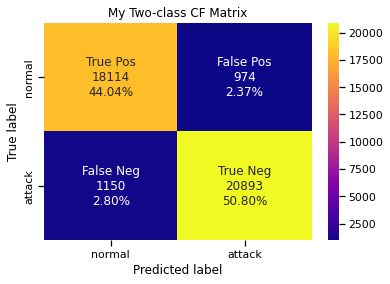

                                  Metrics
Accuracy                         0.948360
Recall                           0.940303
Precision                        0.948973
F1 score                         0.944618
Negative predictive value (NPV)  0.947829
False negative rate (FNR)        0.059697
False positive rate (FPR)        0.044542
True negative rate (TNR)         0.955458
False discovery rate (FDR)       0.050561
False omission rate (FOR)        0.052171


In [ ]:
model = np.load("/content/drive/MyDrive/Colab Notebooks/dataset/model.npy", allow_pickle = True)
model = model.tolist()
y_pred = predict(X_test, model)
print('Loss: ',loss(y_pred, y_test))
y_pred = to_categorical(y_pred)
print('Acc: ',accuracy(y_pred, y_test))
cf_matrix, score = Evaluate(unhot(y_test), unhot(y_pred), 0)
plot_cfmatrix(cf_matrix, ['normal', 'attack'])
print(score)

# **So sánh hiệu suất các thuộc tính: Normal, Dos, Probe, R2L**

        accuracy
Normal  0.940303
DoS     0.960216
Probe   0.967045
R2L     0.926800



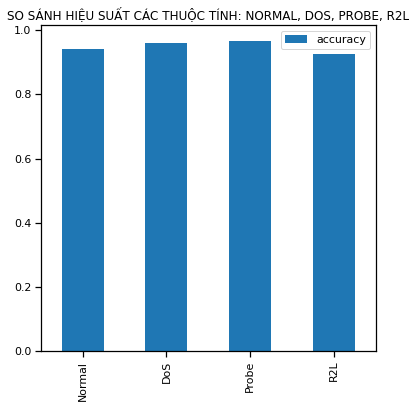

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/test_data.csv')

Normal_Data = data[data['label'] == 'normal']
Dos_Data = data[data['label'] == 'Dos']
Probe_Data = data[data['label'] == 'Probe']
R2L_Data = data[data['label'] == 'R2L']

X_normal = Normal_Data.iloc[:,:n_features].to_numpy()
y_normal = Normal_Data.iloc[:,n_features].to_numpy()

X_Dos = Dos_Data.iloc[:,:n_features].to_numpy()
y_Dos = Dos_Data.iloc[:,n_features].to_numpy()

X_Probe = Probe_Data.iloc[:,:n_features].to_numpy()
y_Probe = Probe_Data.iloc[:,n_features].to_numpy()

X_R2L = R2L_Data.iloc[:,:n_features].to_numpy()
y_R2L = R2L_Data.iloc[:,n_features].to_numpy()

pred_normal = to_categorical(predict(X_normal, model))
pred_Dos = to_categorical(predict(X_Dos, model))
pred_Probe = to_categorical(predict(X_Probe, model))
pred_R2L = to_categorical(predict(X_R2L, model))

acc_normal = accuracy(pred_normal, one_hot(y_normal, n_labels))
acc_Dos = accuracy(pred_Dos, one_hot(y_Dos, n_labels))
acc_Probe = accuracy(pred_Probe, one_hot(y_Probe, n_labels))
acc_R2L = accuracy(pred_R2L, one_hot(y_R2L, n_labels))

df = pd.DataFrame([acc_normal, acc_Dos, acc_Probe, acc_R2L],
                  index = ['Normal', 'DoS', 'Probe', 'R2L'],
                  columns = ['accuracy'])

print(df, end = '\n\n')
fig = df.plot(kind='bar').figure
fig.set_size_inches(6, 6)
plt.title('SO SÁNH HIỆU SUẤT CÁC THUỘC TÍNH: NORMAL, DOS, PROBE, R2L')
plt.show()